## Book Sales and Price EDA

The following notebooks will explore the general trend of sales and pricing options
for books using both kindle and sales dataset

##### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# cleaned book sales dataset
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
sales = pd.read_csv(f'{data_path}book_sales.csv', index_col=[0])
kindle = pd.read_csv(f'{data_path}book_kindle.csv')

# First impression of the data
sales.head()

,genre,sold_by,daily_average_units_sold,publisher_name,publisher_type,average_rating,sale_price,total_reviews,price_range
0,genre fiction,HarperCollins Publishers,7000,Katherine Tegen Books,big five,4.57,4.88,9604,normal
1,genre fiction,HarperCollins Publishers,6250,HarperCollins e-books,big five,4.47,1.99,450,cheap
2,genre fiction,"Amazon Digital Services, Inc.",5500,(Small or Medium Publisher),small/medium,4.16,8.69,30,normal
3,fiction,Hachette Book Group,5500,"Little, Brown and Company",big five,3.84,7.50,3747,normal
4,genre fiction,Penguin Group (USA) LLC,4750,Dutton Children's,big five,4.75,7.99,9174,normal


## Sale Price

In [3]:
# Pair plot
# sns.pairplot(sales)

Total amount of daily average sales group by publisher type.

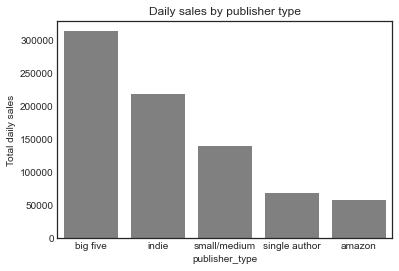

In [4]:
# total sales group by distributors
df = sales.groupby('publisher_type')[['publisher_type','daily_average_units_sold']]\
    .sum().sort_values(by='daily_average_units_sold',ascending=False)

# Bar plot of the total daily sales
sns.barplot(x=df.index, y='daily_average_units_sold', data=df, color='grey')
plt.ylabel('Total daily sales')
plt.title('Daily sales by publisher type')
plt.savefig('images/daily_sales_by_publisher.png')

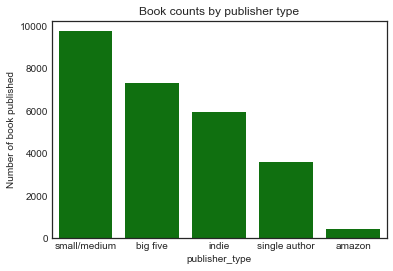

In [5]:
# books count group by distributors
df = sales.groupby('publisher_type')[['publisher_type','daily_average_units_sold']]\
    .count().sort_values(by='daily_average_units_sold',ascending=False)

# Bar plot of the total daily sales
sns.barplot(x=df.index, y='daily_average_units_sold', data=df, color='g')
plt.ylabel('Number of book published')
plt.title('Book counts by publisher type')
plt.savefig('images/book_count_by_publisher.png')

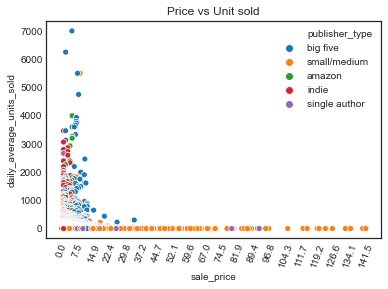

In [6]:
# Price and unit sold break down by publisher type
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales, 
                hue='publisher_type')
plt.xticks(np.linspace(sales.sale_price.min(), sales.sale_price.max(),num=20), rotation=70)
plt.title('Price vs Unit sold')
plt.savefig('images/daily_sales_vs_price_by_publisher.png')

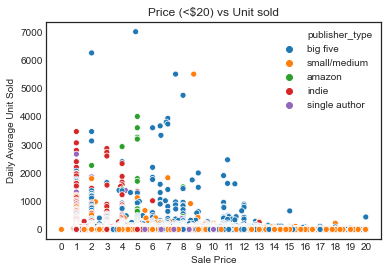

In [25]:
# Zoom in the plot above to price under 20 only
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales[sales.sale_price < 20], 
                hue='publisher_type')
plt.xticks(np.arange(21))
plt.xlabel('Sale Price')
plt.ylabel('Daily Average Unit Sold')
plt.title('Price (<$20) vs Unit sold')
plt.savefig('images/daily_sales_vs_price_20_by_publisher.png')

In [8]:
sales.groupby('publisher_type')['daily_average_units_sold'].count().sort_values(ascending=False)

publisher_type
small/medium     9741
big five         7309
indie            5946
single author    3608
amazon            423
Name: daily_average_units_sold, dtype: int64

While there are many expensive books which is price at over $50, the majority of books are 
affordable (median = 5.12). Moreover, all books published by amazon are all under 20.

The important finding here is all books that are sold over 1000 units per day have a price tag of
less than 15 dollars.

In [9]:
# Median sale price
print('Median book price:', sales.sale_price.median())
print('Mean book price:', sales.sale_price.mean())

Median book price: 5.12
Mean book price: 6.777487697487698


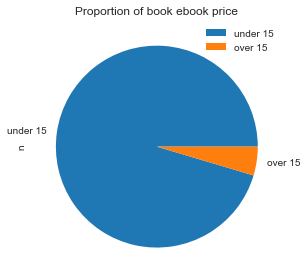

In [28]:
# Number of book price under 15 dollars
under_15 = sum([True for x in sales.sale_price if x < 15])
over_15 = len(sales) - under_15

# Proportion of books sales under 20 vs over 20
df = pd.DataFrame({'n':[under_15, over_15]},
                  index=['under 15', 'over 15'])
df.plot.pie(y='n')
plt.title('Proportion of book ebook price')
plt.tight_layout()
plt.savefig('images/proportion_book_under15.png')

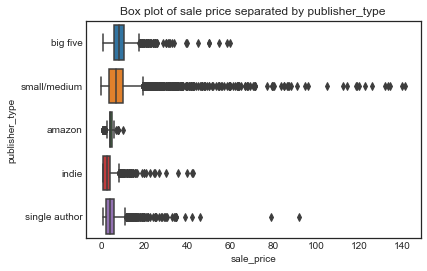

In [11]:
# Sale price box plot
sns.boxplot(x='sale_price', y='publisher_type', data=sales)
plt.title('Box plot of sale price separated by publisher_type')
plt.savefig('images/sale_price_by_publisher_type.png')

Text(0.5, 1.0, 'Book sale price distribution')

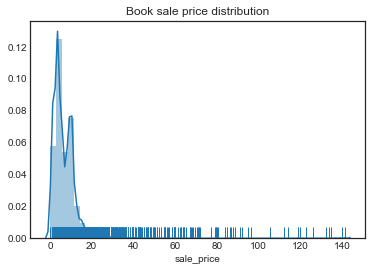

In [12]:
# Sale price distribution
sns.distplot(sales.sale_price, kde=True, rug=True)
plt.title('Book sale price distribution')

Lets take a look at books publisher broken down through a price range.

In [13]:
for price in [20, 40, 80, 100]:
    print(f'Price over ${price}\n', 
          sales[sales.sale_price > price].publisher_type.value_counts(), '\n\n')

Price over $20
 small/medium     441
big five          46
single author     31
indie             10
Name: publisher_type, dtype: int64 


Price over $40
 small/medium     97
big five          6
single author     4
indie             2
Name: publisher_type, dtype: int64 


Price over $80
 small/medium     25
single author     1
Name: publisher_type, dtype: int64 


Price over $100
 small/medium    13
Name: publisher_type, dtype: int64 




## Veblen goods

We suspect books should have some properties of veblen goods where the higher
the price, the higher the demand - up to a certain point.

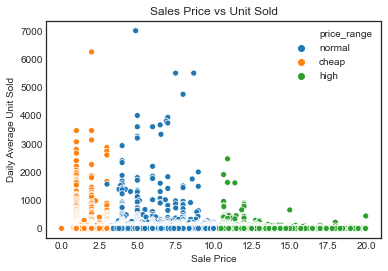

In [41]:
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales[sales.price_range!='extra'],
                hue='price_range')
plt.ylabel('Daily Average Unit Sold')
plt.xlabel('Sale Price')
plt.title('Sales Price vs Unit Sold')
plt.savefig('images/sale_price_unit_sold.png')

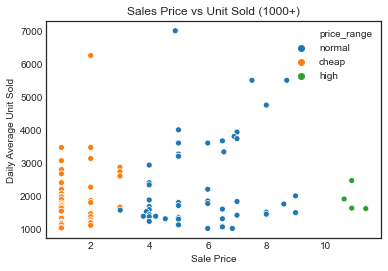

In [40]:
sns.scatterplot(x='sale_price', y='daily_average_units_sold',
                data=sales[(sales.daily_average_units_sold > 1000) & (sales.sale_price < 20)],
                hue='price_range')
plt.ylabel('Daily Average Unit Sold')
plt.xlabel('Sale Price')
plt.title('Sales Price vs Unit Sold (1000+)')
plt.savefig('images/sale_price_unit_sold_1000.png')

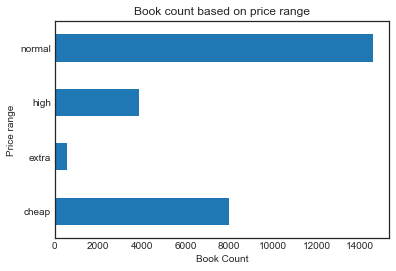

In [20]:
# Get the book count by price range
sales.groupby('price_range').size().plot(kind='barh')
plt.title('Book count based on price range')
plt.xlabel('Book Count')
plt.ylabel('Price range')
plt.savefig('images/book_count_price_range.png')

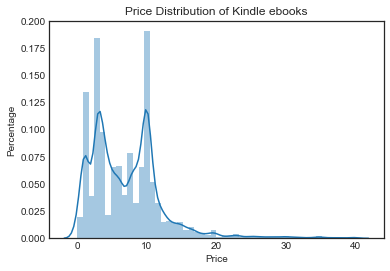

In [49]:
sns.distplot(kindle[kindle.price < 40].price)
plt.ylabel('Percentage')
plt.xlabel('Price')
plt.title('Price Distribution of Kindle ebooks')
plt.savefig('images/price_kindle_dist.png')

### Ratings and Reviews

There is no apparent relationship between total reviews and unit sold even when we
control for outliers. This is troublesome since it will greatly decrease the usefulness
of our second dataset. 

However, high count of reviews is not high rating. Thus, the amount of reviews may be 
correlated to other factor such as time since published and genre. 

In [ ]:
# Total review versus unit sold
sales.plot(kind='scatter', y='daily_average_units_sold', x='total_reviews')
plt.title('units sold vs number of reviews')
plt.savefig('images/unit_sold_vs_total_reviews.png')

In [ ]:
# Total review (<4000) versus unit sold
sales[sales.total_reviews < 4000].plot(kind='scatter', y='daily_average_units_sold', x='total_reviews')
plt.title('units_sold vs total_reviews (<4000)')

In [ ]:
df.plot.barh()
plt.title('Number of book genre')
plt.savefig('images/book_genre.png')

Taking a quick look into genre of sale data, we see again there are so many observations
that are out of normal range. All this behavior strongly suggest that bestsellers makes
up the bulk of big money in book sale. There are hundreds of thousands of books but
perhaps only the small fraction of bestsellers enjoy the majority of the revenue.

A majority of books has a good average rating of over 4. However, fiction and genre
fictions makes up the majority of sales. 

There is a subgroup that has zero average rating. We should take a look at these to 
see why.

In [ ]:
# Rating Distribution
sns.distplot(sales.average_rating, kde=True, rug=True)
plt.title('Average Rating Histogram')
plt.savefig('images/average_rating_hist.png')

In [ ]:
# Average rating vs units_sold
sns.scatterplot(x='average_rating', y='daily_average_units_sold', data=sales,
                hue='publisher_type')
plt.title('Average Rating vs. Units sold')
plt.savefig('images/average_rating_vs_unit_sold.png')

In [ ]:
# Number of reviews vs unit sold
sns.scatterplot(x='total_reviews', y='daily_average_units_sold', data=sales,
                hue='publisher_type')
plt.title('Total Number of Reviews vs Units sold')
plt.savefig('images/number_reviews_vs_units_sold.png')